In [53]:
#bibliotecas padrão
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#limpar warnings
import warnings
warnings.simplefilter("ignore")

## Análise Exploratória de Dados

In [54]:
#import dataset
credit_raw = pd.read_excel("D:\\DESKTOP\\PROJETOS_PYTHON\\credit_score\\CASE.xlsx", sheet_name="data")

In [55]:
#primeiras linhas
credit_raw.head(3)

Cliente  anomes  inadimpl_over30  fl_consig  ...  score_h2  score_h3  \
0  1000000  202111                0          0  ...       576       720   
1  1000001  202111                0          0  ...       421       587   
2  1000002  202111                0          0  ...       689       697   

   score_h4  score_h5  
0       270       511  
1       298       238  
2       733       457  

[3 rows x 15 columns]

In [56]:
#proporação de clientes inadimplentes
group_inad = credit_raw.groupby('inadimpl_over30')['Cliente'].count()
print(group_inad)

tx = group_inad[1] / group_inad.sum()
print("Taxa de inadimplência: ",np.round(tx, decimals=3)*100, "%")

inadimpl_over30
0    13478
1     4941
Name: Cliente, dtype: int64
Taxa de inadimplência:  26.8 %


In [57]:
#dimensão do dataset
credit_raw.shape

(18419, 15)

In [58]:
#exibir tipo de dados
credit_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18419 entries, 0 to 18418
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cliente                    18419 non-null  int64  
 1   anomes                     18419 non-null  int64  
 2   inadimpl_over30            18419 non-null  int64  
 3   fl_consig                  18419 non-null  int64  
 4   fl_veiculos                18419 non-null  int64  
 5   flagcontaativabd           18419 non-null  int64  
 6   idade_serasa               18419 non-null  int64  
 7   renda                      18419 non-null  int64  
 8   limite_cartao              18413 non-null  float64
 9   vr_exposicao_total_cartao  18419 non-null  float64
 10  score_h1                   18419 non-null  int64  
 11  score_h2                   18419 non-null  int64  
 12  score_h3                   18419 non-null  int64  
 13  score_h4                   18419 non-null  int

<AxesSubplot:>

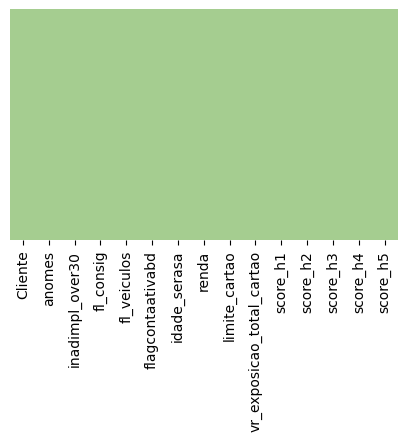

In [59]:
#visualizar valores nulos
plt.figure(figsize=(5, 3))
sns.heatmap(credit_raw.isnull(), yticklabels=False, cbar=False, cmap='crest')

In [60]:
credit_raw.isnull().sum().sort_values(ascending=False)

limite_cartao                6
Cliente                      0
anomes                       0
inadimpl_over30              0
fl_consig                    0
fl_veiculos                  0
flagcontaativabd             0
idade_serasa                 0
renda                        0
vr_exposicao_total_cartao    0
score_h1                     0
score_h2                     0
score_h3                     0
score_h4                     0
score_h5                     0
dtype: int64

In [61]:
credit_raw.dropna(inplace=True)

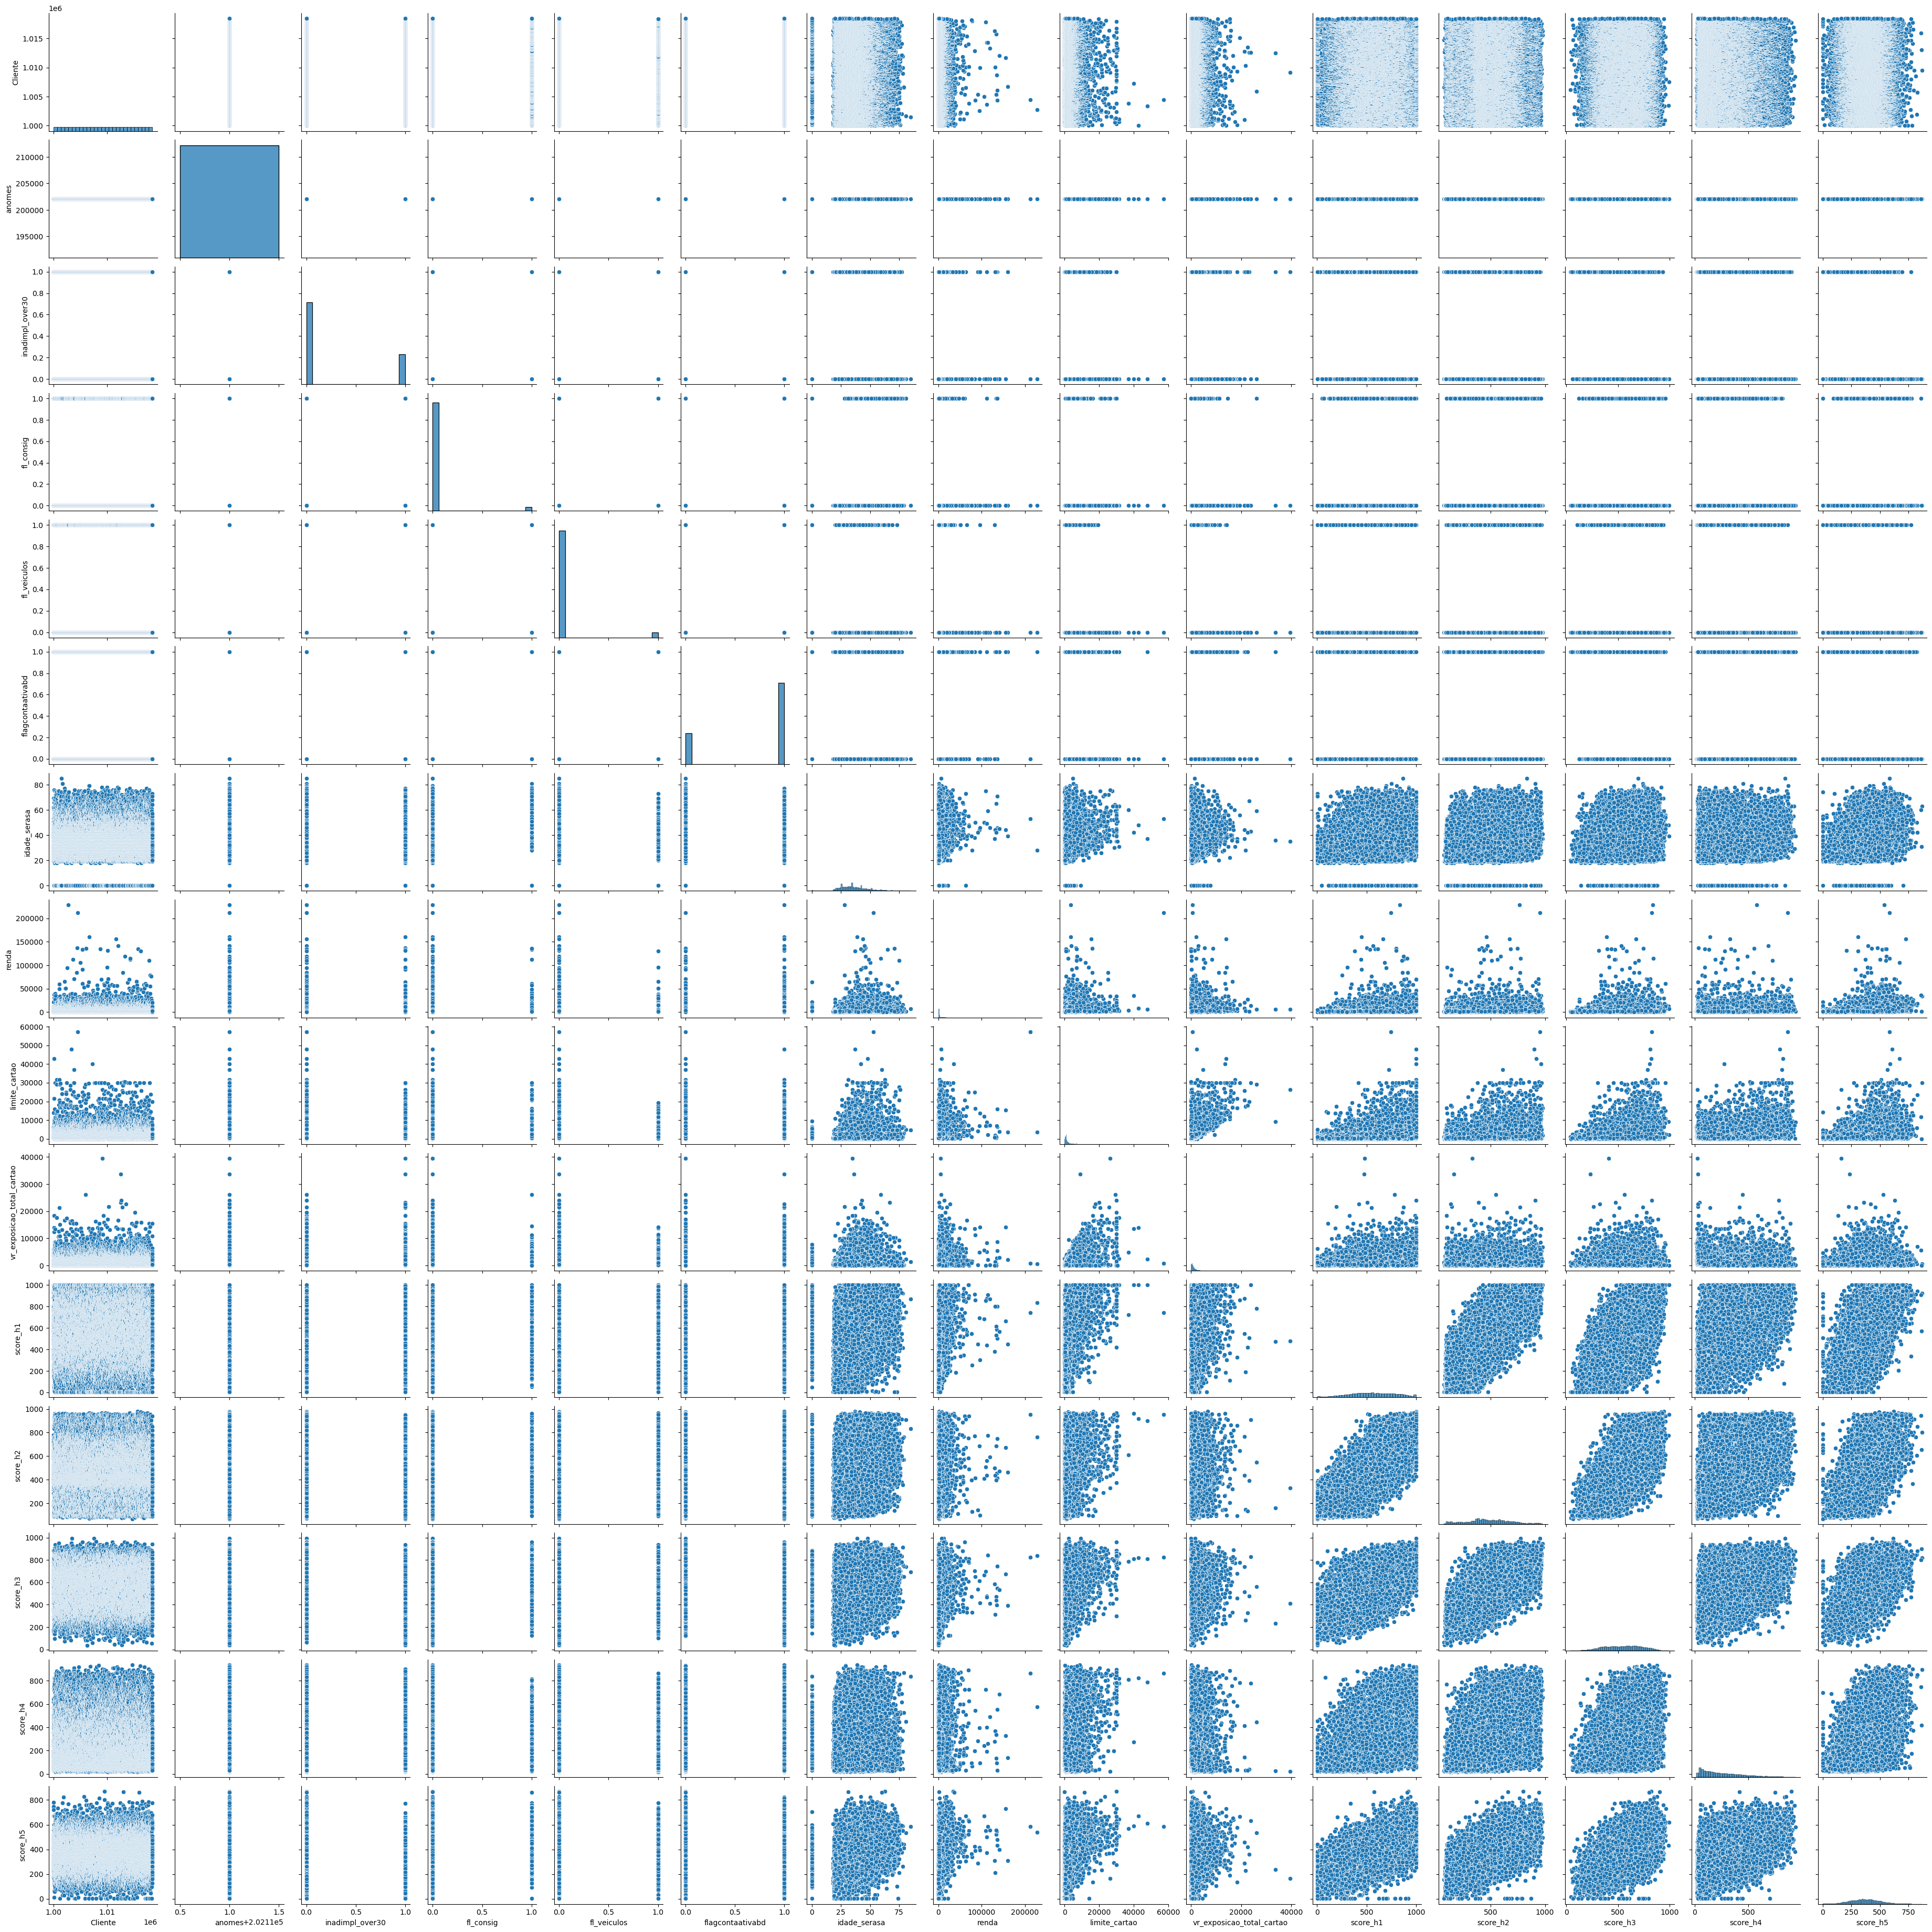

In [62]:
sns.pairplot(credit_raw)

In [63]:
# faixa para agrupamento de GH
print("Faixa de GH: ", 1000/8)

Faixa de GH:  125.0


In [64]:
def GH(score):
    
    if score <= 125:
        return "GH_8"
    elif score <= 250:
        return "GH_7"
    elif score <= 375:
        return "GH_6"
    elif score <= 500:
        return "GH_5"
    elif score <= 625:
        return "GH_4"
    elif score <= 750:
        return "GH_3"
    elif score <= 875:
        return "GH_2"
    else:
        return "GH_1"
    
credit_raw['GH_score_h1'] = credit_raw.apply(lambda x: GH(x['score_h1']), axis=1)
credit_raw['GH_score_h2'] = credit_raw.apply(lambda x: GH(x['score_h2']), axis=1)
credit_raw['GH_score_h3'] = credit_raw.apply(lambda x: GH(x['score_h3']), axis=1)
credit_raw['GH_score_h4'] = credit_raw.apply(lambda x: GH(x['score_h4']), axis=1)
credit_raw['GH_score_h5'] = credit_raw.apply(lambda x: GH(x['score_h5']), axis=1)

In [65]:
credit_raw.head(10)

Cliente  anomes  inadimpl_over30  fl_consig  ...  GH_score_h2  GH_score_h3  \
0  1000000  202111                0          0  ...         GH_4         GH_3   
1  1000001  202111                0          0  ...         GH_5         GH_4   
2  1000002  202111                0          0  ...         GH_3         GH_3   
3  1000003  202111                1          0  ...         GH_6         GH_4   
4  1000004  202111                0          0  ...         GH_4         GH_3   
5  1000005  202111                0          0  ...         GH_4         GH_4   
6  1000006  202111                0          0  ...         GH_6         GH_5   
7  1000007  202111                0          0  ...         GH_3         GH_4   
8  1000008  202111                0          0  ...         GH_4         GH_3   
9  1000009  202111                0          0  ...         GH_6         GH_5   

   GH_score_h4  GH_score_h5  
0         GH_6         GH_4  
1         GH_6         GH_7  
2         GH_3         GH_5  
3         GH_7         GH_5  
4         GH_4         GH_4  
5         GH_7         GH_6  
6         GH_8         GH_6  
7         GH_6         GH_5  
8         GH_6         GH_3  
9         GH_7         GH_7  

[10 rows x 20 columns]

In [66]:
credit_raw.groupby(['GH_score_h1', 'inadimpl_over30'])['inadimpl_over30'].count()

GH_score_h1  inadimpl_over30
GH_1         0                  1611
             1                    93
GH_2         0                  2464
             1                   224
GH_3         0                  2655
             1                   412
GH_4         0                  2521
             1                   805
GH_5         0                  2065
             1                  1182
GH_6         0                  1260
             1                  1097
GH_7         0                   645
             1                   697
GH_8         0                   252
             1                   430
Name: inadimpl_over30, dtype: int64

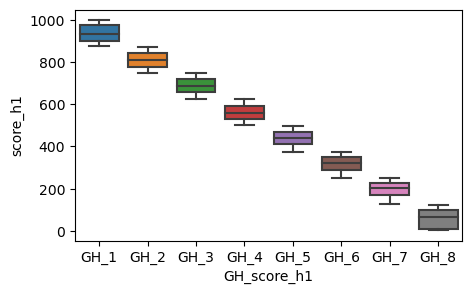

In [67]:
a4_dims = (5, 3)
fig, ax = plt.subplots(figsize=a4_dims)
# seaborn.violinplot(ax=ax, data=df, **violin_options)

sns.boxplot(ax=ax, x=credit_raw["GH_score_h1"], y=credit_raw["score_h1"], width=0.8, 
                order=["GH_1", "GH_2", "GH_3", "GH_4", "GH_5","GH_6", "GH_7", "GH_8"]);
plt.show()

## Conhecendos os KS

In [68]:
#from scipy
from scipy import stats

def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    #print(kstable)
    
    #Display KS
    from colorama import Fore
    #print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

How to use Function

mydf = ks(data=df,target="y", prob="p")
    data refers to pandas dataframe which contains both dependent variable and probability scores.
    target refers to column name of dependent variable
    prob refers to column name of predicted probablity


In [69]:
#ks_score_h1
ks_teste1 = credit_raw.loc[:, ['score_h1', 'inadimpl_over30']]
ks_teste1['score_h1'] = 1-(ks_teste1['score_h1'] / 1000)

#ks_core_h2
ks_teste2 = credit_raw.loc[:, ['score_h2', 'inadimpl_over30']]
ks_teste2['score_h2'] = 1-(ks_teste2['score_h2'] / 1000)

#ks_score_h3
ks_teste3 = credit_raw.loc[:, ['score_h3', 'inadimpl_over30']]
ks_teste3['score_h3'] = 1-(ks_teste3['score_h3'] / 1000)

#ks_score_h4
ks_teste4 = credit_raw.loc[:, ['score_h4', 'inadimpl_over30']]
ks_teste4['score_h4'] = 1-(ks_teste4['score_h4'] / 1000)

#ks_csore_h5
ks_teste5 = credit_raw.loc[:, ['score_h5', 'inadimpl_over30']]
ks_teste5['score_h5'] = 1-(ks_teste5['score_h5'] / 1000)

In [70]:
ks_teste_v2 = ks(ks_teste1, target='inadimpl_over30', prob='score_h1')
ks_teste_v2

min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1          0.764     0.997    1027        793     20.79%         5.89%   
2          0.659     0.762     892        965     18.06%         7.16%   
3          0.579     0.657     757       1071     15.32%         7.95%   
4          0.512     0.577     646       1170     13.08%         8.68%   
5          0.445     0.510     487       1347      9.86%        10.00%   
6          0.372     0.443     416       1473      8.42%        10.93%   
7          0.298     0.370     269       1572      5.45%        11.67%   
8          0.222     0.296     194       1632      3.93%        12.11%   
9          0.135     0.220     144       1686      2.91%        12.51%   
10         0.000     0.133     108       1764      2.19%        13.09%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             20.79%            5.89%  14.9  
2             38.85%           13.05%  25.8  
3             54.17%           21.00%  33.2  
4             67.25%           29.68%  37.6  
5             77.11%           39.68%  37.4  
6             85.53%           50.61%  34.9  
7             90.97%           62.28%  28.7  
8             94.90%           74.39%  20.5  
9             97.81%           86.91%  10.9  
10           100.00%          100.00%  -0.0

In [71]:
ks_teste2_v2 = ks(ks_teste2, target='inadimpl_over30', prob='score_h2')
ks_teste2_v2

min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1          0.803     0.932    1040        795     21.05%         5.90%   
2          0.684     0.802     896        930     18.14%         6.90%   
3          0.622     0.682     744       1090     15.06%         8.09%   
4          0.579     0.621     592       1271     11.98%         9.43%   
5          0.529     0.578     463       1369      9.37%        10.16%   
6          0.469     0.527     371       1486      7.51%        11.03%   
7          0.418     0.467     306       1527      6.19%        11.33%   
8          0.347     0.416     228       1588      4.62%        11.79%   
9          0.260     0.345     202       1656      4.09%        12.29%   
10         0.021     0.257      98       1761      1.98%        13.07%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             21.05%            5.90%  15.2  
2             39.19%           12.80%  26.4  
3             54.25%           20.89%  33.4  
4             66.23%           30.33%  35.9  
5             75.61%           40.49%  35.1  
6             83.12%           51.52%  31.6  
7             89.31%           62.85%  26.5  
8             93.93%           74.64%  19.3  
9             98.02%           86.93%  11.1  
10           100.00%          100.00%   0.0

In [72]:
ks_teste3_v2 = ks(ks_teste3, target='inadimpl_over30', prob='score_h3')
ks_teste3_v2

min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1          0.682     0.963    1151        691     23.30%         5.13%   
2          0.617     0.681     860        952     17.41%         7.07%   
3          0.557     0.616     759       1091     15.36%         8.10%   
4          0.498     0.556     559       1294     11.32%         9.60%   
5          0.443     0.497     465       1356      9.41%        10.06%   
6          0.390     0.442     325       1515      6.58%        11.24%   
7          0.338     0.389     292       1546      5.91%        11.47%   
8          0.285     0.337     229       1645      4.64%        12.21%   
9          0.221     0.284     182       1630      3.68%        12.10%   
10         0.005     0.220     118       1753      2.39%        13.01%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             23.30%            5.13%  18.2  
2             40.71%           12.19%  28.5  
3             56.07%           20.29%  35.8  
4             67.39%           29.90%  37.5  
5             76.80%           39.96%  36.8  
6             83.38%           51.21%  32.2  
7             89.29%           62.68%  26.6  
8             93.93%           74.89%  19.0  
9             97.61%           86.99%  10.6  
10           100.00%          100.00%   0.0

In [73]:
ks_teste4_v2 = ks(ks_teste4, target='inadimpl_over30', prob='score_h4')
ks_teste4_v2

min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1          0.947     0.983     840        928     17.00%         6.89%   
2          0.916     0.946     781       1106     15.81%         8.21%   
3          0.875     0.915     714       1154     14.45%         8.57%   
4          0.832     0.874     575       1239     11.64%         9.20%   
5          0.779     0.831     496       1361     10.04%        10.10%   
6          0.716     0.778     454       1379      9.19%        10.24%   
7          0.646     0.715     364       1481      7.37%        10.99%   
8          0.559     0.645     298       1552      6.03%        11.52%   
9          0.431     0.558     238       1606      4.82%        11.92%   
10         0.064     0.430     180       1667      3.64%        12.37%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             17.00%            6.89%  10.1  
2             32.81%           15.10%  17.7  
3             47.27%           23.66%  23.6  
4             58.91%           32.86%  26.0  
5             68.95%           42.96%  26.0  
6             78.14%           53.20%  24.9  
7             85.51%           64.19%  21.3  
8             91.54%           75.71%  15.8  
9             96.36%           87.63%   8.7  
10           100.00%          100.00%   0.0

In [74]:
ks_teste5_v2 = ks(ks_teste5, target='inadimpl_over30', prob='score_h5')
ks_teste5_v2

min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1          0.796     0.999    1030        807     20.85%         5.99%   
2          0.743     0.795     824       1009     16.68%         7.49%   
3          0.699     0.742     663       1181     13.42%         8.77%   
4          0.664     0.698     614       1197     12.43%         8.88%   
5          0.631     0.663     522       1327     10.57%         9.85%   
6          0.597     0.630     397       1440      8.04%        10.69%   
7          0.563     0.596     312       1539      6.32%        11.42%   
8          0.522     0.562     281       1571      5.69%        11.66%   
9          0.467     0.521     195       1641      3.95%        12.18%   
10         0.131     0.466     102       1761      2.06%        13.07%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             20.85%            5.99%  14.9  
2             37.53%           13.48%  24.1  
3             50.95%           22.24%  28.7  
4             63.38%           31.13%  32.3  
5             73.95%           40.98%  33.0  
6             81.98%           51.67%  30.3  
7             88.30%           63.09%  25.2  
8             93.99%           74.75%  19.2  
9             97.94%           86.93%  11.0  
10           100.00%          100.00%   0.0

In [75]:
from scipy.stats import ks_2samp

teste = credit_raw.copy()
teste = teste.loc[:, ['inadimpl_over30', 'score_h1', 'score_h2', 'score_h3', 'score_h4', 'score_h5']]

print("KS score_h1: ",ks_2samp(teste.loc[teste.inadimpl_over30 == 1, "score_h1"], 
                               teste.loc[teste.inadimpl_over30 == 0, "score_h1"]))
print("KS score_h2: ",ks_2samp(teste.loc[teste.inadimpl_over30 == 1, "score_h2"], 
                               teste.loc[teste.inadimpl_over30 == 0, "score_h2"]))
print("KS score_h3: ",ks_2samp(teste.loc[teste.inadimpl_over30 == 1, "score_h3"], 
                               teste.loc[teste.inadimpl_over30 == 0, "score_h3"]))
print("KS score_h4: ",ks_2samp(teste.loc[teste.inadimpl_over30 == 1, "score_h4"], 
                               teste.loc[teste.inadimpl_over30 == 0, "score_h4"]))
print("KS score_h5: ",ks_2samp(teste.loc[teste.inadimpl_over30 == 1, "score_h5"], 
                               teste.loc[teste.inadimpl_over30 == 0, "score_h5"]))

KS score_h1:  KstestResult(statistic=0.37896126636238436, pvalue=0.0)
KS score_h2:  KstestResult(statistic=0.3607345595374284, pvalue=0.0)
KS score_h3:  KstestResult(statistic=0.37720504737169647, pvalue=0.0)
KS score_h4:  KstestResult(statistic=0.2638552408460646, pvalue=1.321090558219514e-222)
KS score_h5:  KstestResult(statistic=0.3337797652585122, pvalue=0.0)


## Feature Engineering

### Combinação linear: novas variáveis

In [76]:
credit_raw_v2 = credit_raw.copy()

#variável multiplicador de limite
credit_raw_v2['mult_lim'] = credit_raw_v2['limite_cartao'] / credit_raw_v2['renda']

#variável comprometimento de renda
credit_raw_v2['comp_renda'] = credit_raw_v2['vr_exposicao_total_cartao'] / credit_raw_v2['renda']

#variável comprometimento de limite
credit_raw_v2['comp_limite'] = credit_raw_v2['vr_exposicao_total_cartao'] / credit_raw_v2['limite_cartao']

### Remoção de Outliers

In [77]:
outliers_df = credit_raw_v2.copy()
cols = ['renda', 'limite_cartao', 'vr_exposicao_total_cartao', 'mult_lim', 'comp_renda', 'comp_limite']

Q1 = outliers_df[cols].quantile(0.25)
Q3 = outliers_df[cols].quantile(0.75)
IQR = Q3 - Q1

outliers_df = outliers_df[~((outliers_df[cols] < (Q1 - 1.5 * IQR)) |(outliers_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Dimensão do dataset original com outliers: ", credit_raw_v2.shape)
print("Dimensão do dataset sem outliers: ", outliers_df.shape)

print(outliers_df.columns)

Dimensão do dataset original com outliers:  (18413, 23)
Dimensão do dataset sem outliers:  (14382, 23)
Index(['Cliente', 'anomes', 'inadimpl_over30', 'fl_consig', 'fl_veiculos',
       'flagcontaativabd', 'idade_serasa', 'renda', 'limite_cartao',
       'vr_exposicao_total_cartao', 'score_h1', 'score_h2', 'score_h3',
       'score_h4', 'score_h5', 'GH_score_h1', 'GH_score_h2', 'GH_score_h3',
       'GH_score_h4', 'GH_score_h5', 'mult_lim', 'comp_renda', 'comp_limite'],
      dtype='object')


### Normalização

In [78]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# separação de variáveis dependente e independentes
X = outliers_df.loc[:, ["fl_consig", "fl_veiculos", "flagcontaativabd", "idade_serasa", "renda", "limite_cartao",
                           "vr_exposicao_total_cartao"]].values # "mult_lim", "comp_renda", "comp_limite"]].values
y = outliers_df.loc[:, ["inadimpl_over30"]].values

#divisão de dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=5)

#normalização padrão
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

#modelo de regressão logística
logistic = LogisticRegression()
logistic.fit(X_train_scaled, y_train)

#predições
y_test_pred = logistic.predict(X_test_scaled)
y_train_pred = logistic.predict(X_train_scaled)

train_acc = logistic.score(X_train_scaled, y_train)
print("Acurácia nos dados de treino {}".format((train_acc*100)))

Acurácia nos dados de treino 72.19543853142963


### Matriz de confusão

In [79]:
from sklearn.metrics import confusion_matrix
 
cm_train = confusion_matrix(y_train,y_train_pred)
cm_teste = confusion_matrix(y_test,y_test_pred)

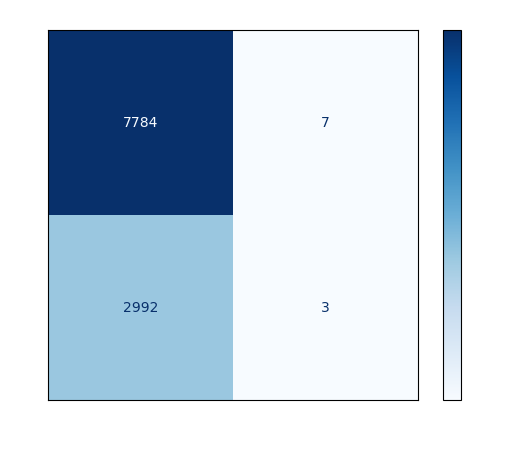

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'white'
matrix = plot_confusion_matrix(logistic, X_train_scaled, y_train, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

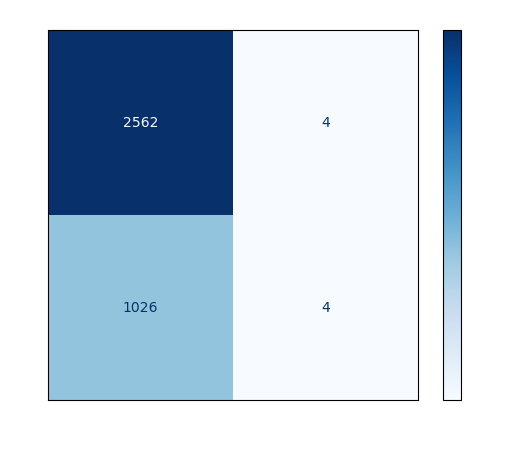

In [81]:
color = 'white'
matrix = plot_confusion_matrix(logistic, X_test_scaled, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

### Feature Importance

In [82]:
import math

w0, w1, w2, w3, w4, w5, w6 = logistic.coef_[0]
w = [w0, w1, w2, w3, w4, w5, w6]

names = ["fl_consig", "fl_veiculos", "flagcontaativabd", "idade_serasa", "renda", "limite_cartao",
                           "vr_exposicao_total_cartao"]
df_importance = pd.DataFrame(names, columns=['variavel'])
df_importance['importancia'] = pow(math.e, np.array(w))

df_importance.sort_values(ascending=False, by='importancia')

variavel  importancia
6  vr_exposicao_total_cartao     1.650690
2           flagcontaativabd     1.193233
4                      renda     1.079022
0                  fl_consig     1.028922
3               idade_serasa     0.954419
1                fl_veiculos     0.943884
5              limite_cartao     0.559932

### Cross validation

In [83]:
from sklearn.model_selection import cross_validate
# logistic.fit(X_train_scaled, y_train)

nome_metricas = ['accuracy', 'roc_auc', 'neg_mean_squared_error']
metricas = cross_validate(logistic, X_train_scaled, y_train, cv=10, scoring=nome_metricas)
for met in metricas:
    print(f"{met}:")
    print("\n", f"{metricas[met]}")

fit_time:

 [0.         0.         0.01562285 0.         0.01562095 0.
 0.00400448 0.0120039  0.01562715 0.0156188 ]
score_time:

 [0.01562095 0.         0.         0.         0.         0.01562071
 0.         0.         0.         0.        ]
test_accuracy:

 [0.721038   0.72289157 0.721038   0.72289157 0.72196478 0.72011121
 0.72263451 0.72170686 0.72170686 0.71985158]
test_roc_auc:

 [0.58700369 0.64703466 0.61382114 0.63042362 0.62943517 0.60007274
 0.63854268 0.63087485 0.62427604 0.59246697]
test_neg_mean_squared_error:

 [-0.278962   -0.27710843 -0.278962   -0.27710843 -0.27803522 -0.27988879
 -0.27736549 -0.27829314 -0.27829314 -0.28014842]


### Área sobre a Curva ROC

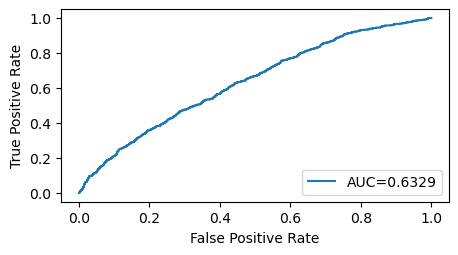

In [84]:
from sklearn import metrics
#define metrics

y_pred_proba = logistic.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = np.round(metrics.roc_auc_score(y_test, y_pred_proba), decimals=4)

#create ROC curve
plt.figure(figsize=(5,2.5))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Dataset com scores (probabilidades da Regressão Logistica)

In [86]:
logistic_df = LogisticRegression()
logistic_df.fit(X, y)


df_score_logistic = pd.DataFrame()
df_score_logistic['score'] = logistic_df.predict_proba(X)[::,1]
df_score_logistic['inadimpl_over30'] = y
df_score_logistic['score_h1'] = credit_raw['score_h1']

In [87]:
df_score_logistic.describe()

score  inadimpl_over30      score_h1
count  14382.000000     14382.000000  14378.000000
mean       0.279851         0.279864    556.096606
std        0.079536         0.448948    233.995678
min        0.016106         0.000000      3.000000
25%        0.234974         0.000000    387.000000
50%        0.298493         0.000000    557.000000
75%        0.333113         1.000000    740.000000
max        0.616388         1.000000   1000.000000

In [88]:
#ks_score_logistic
ks_score_logistic = df_score_logistic.loc[:, ['score', 'inadimpl_over30', 'score_h1']]
ks_score_logistic['score'] = 1-(ks_score_logistic['score'] / 1000)
ks_score_logistic['score_h1'] = 1-(ks_score_logistic['score_h1'] / 1000)

print("KS score_logistic: ",ks_2samp(ks_score_logistic.loc[ks_score_logistic.inadimpl_over30 == 1, "score"], 
                               ks_score_logistic.loc[ks_score_logistic.inadimpl_over30 == 0, "score"]))

KS score_logistic:  KstestResult(statistic=0.18980608428182216, pvalue=6.25476383095659e-92)


### Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=44, n_jobs=-1)
random_forest.fit(X_train_scaled, y_train)

predictions = random_forest.predict(X_test_scaled)

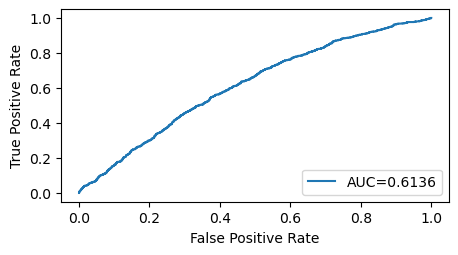

In [90]:
from sklearn import metrics
#define metrics

y_pred_proba = random_forest.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = np.round(metrics.roc_auc_score(y_test, y_pred_proba), decimals=4)

#create ROC curve
plt.figure(figsize=(5,2.5))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [91]:
from sklearn.model_selection import cross_validate
# logistic.fit(X_train_scaled, y_train)

nome_metricas = ['accuracy', 'roc_auc', 'neg_mean_squared_error']
metricas = cross_validate(random_forest, X_train_scaled, y_train, cv=10, scoring=nome_metricas)
for met in metricas:
    print(f"{met}:")
    print("\n", f"{metricas[met]}")

fit_time:

 [4.43993378 0.65920568 0.59702325 0.64301467 0.56496358 0.54934382
 0.56537461 0.66765523 0.56494904 0.56535006]
score_time:

 [0.20388436 0.20387697 0.18823695 0.18773842 0.20387101 0.20386958
 0.18824816 0.19486761 0.20387173 0.21949768]
test_accuracy:

 [0.72289157 0.72196478 0.72196478 0.72196478 0.72196478 0.72196478
 0.72263451 0.72263451 0.72263451 0.72263451]
test_roc_auc:

 [0.57747191 0.63378691 0.61067608 0.61720154 0.60790757 0.58813864
 0.60958007 0.60517944 0.62713538 0.59534778]
test_neg_mean_squared_error:

 [-0.27710843 -0.27803522 -0.27803522 -0.27803522 -0.27803522 -0.27803522
 -0.27736549 -0.27736549 -0.27736549 -0.27736549]


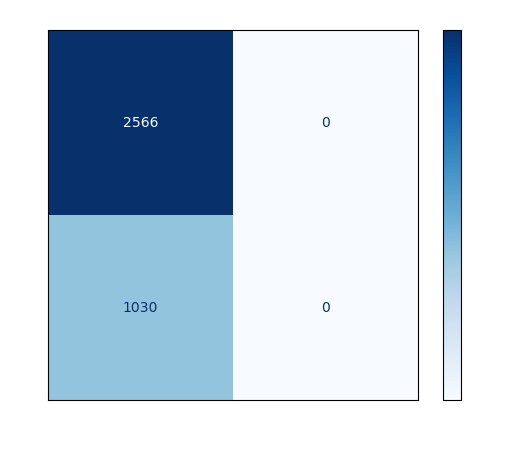

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'white'
matrix = plot_confusion_matrix(random_forest, X_test_scaled, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

### Dataset com scores (probabilidades da Random Forest)

In [106]:
random_forest.fit(X, y)


df_random_forest = pd.DataFrame()
df_random_forest['score_rf'] = np.round(random_forest.predict_proba(X)[::,1]*1000, 0)
df_random_forest['score_h1'] = outliers_df['score_h1']
df_random_forest['inadimpl_over30'] = y
df_random_forest['renda'] = outliers_df['renda']
df_random_forest['limite_cartao'] = outliers_df['limite_cartao']
df_random_forest['vr_exposicao_total_cartao'] = outliers_df['vr_exposicao_total_cartao']

#decil p/ scores de cada modelo
df_random_forest['GH_score_h1'] = pd.qcut(outliers_df['score_h1'], 5, labels=False)
df_random_forest['GH_score_rf'] = pd.qcut(df_random_forest['score_rf'], 5, labels=False)

#exportar csv
df_random_forest.to_csv('blend.csv', index=False, sep=";", decimal=",")

In [102]:
#ks_score_random_forest
ks_score_rf = df_random_forest.loc[:, ['score_rf', 'inadimpl_over30', 'score_h1']]
ks_score_rf['score'] = (ks_score_rf['score_rf'] / 1000)
ks_score_rf['score_h1'] = ks_score_rf['score_h1']

print("KS score_random_forest: ",ks_2samp(ks_score_rf.loc[ks_score_rf.inadimpl_over30 == 1, "score_rf"], 
                               ks_score_rf.loc[ks_score_rf.inadimpl_over30 == 0, "score_rf"]))

KS score_random_forest:  KstestResult(statistic=0.2260429379235816, pvalue=1.2085461197859836e-130)


In [103]:
ks_score_rf_v2 = ks(ks_score_rf, target='inadimpl_over30', prob='score_rf')
ks_score_rf_v2

min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1          328.0     420.0     714        725     17.74%         7.00%   
2          315.0     327.0     533        796     13.24%         7.69%   
3          305.0     314.0     510        928     12.67%         8.96%   
4          296.0     304.0     467       1033     11.60%         9.97%   
5          287.0     295.0     401        979      9.96%         9.45%   
6          275.0     286.0     354       1148      8.80%        11.08%   
7          261.0     274.0     358       1109      8.89%        10.71%   
8          243.0     260.0     286       1117      7.11%        10.78%   
9          222.0     242.0     247       1232      6.14%        11.90%   
10         164.0     221.0     155       1290      3.85%        12.46%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             17.74%            7.00%  10.7  
2             30.98%           14.69%  16.3  
3             43.65%           23.65%  20.0  
4             55.25%           33.62%  21.6  
5             65.22%           43.07%  22.1  
6             74.01%           54.16%  19.9  
7             82.91%           64.86%  18.0  
8             90.01%           75.65%  14.4  
9             96.15%           87.54%   8.6  
10           100.00%          100.00%  -0.0